# 逻辑回归:分类算法

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.metrics import accuracy_score,mean_squared_error,r2_score
from sklearn.datasets import load_iris,load_diabetes
import warnings
warnings.filterwarnings("ignore")

In [16]:
data=load_iris()
X=data['data']
y=data['target']

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

### 无调参的逻辑回归模型

In [26]:
logistic_regression=LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)
# print('MSE: %.2f'%mean_squared_error(y_test,y_pred))
print('准确率: %.3f'%accuracy_score(y_test,y_pred))

准确率: 1.000


### 增加正则项:

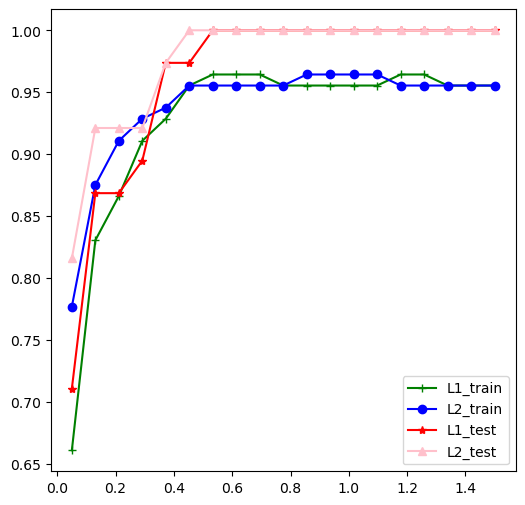

In [25]:
l1 = []
l2 = []
l1test = []
l2test = []

for i in np.linspace(0.05,1.5,19):
    lrl1 = LogisticRegression(penalty="l1",solver="liblinear",C=i,max_iter=1000)#加入L1正则化,liblinear为使用了坐标轴下降法来迭代优化损失函数,C越小正则化越强,迭代次数为1000
    lrl2 = LogisticRegression(penalty="l2",solver="liblinear",C=i,max_iter=1000)
    
    lrl1 = lrl1.fit(X_train,y_train)
    l1.append(accuracy_score(lrl1.predict(X_train),y_train))#保存19个准确率
    l1test.append(accuracy_score(lrl1.predict(X_test),y_test))
    lrl2 = lrl2.fit(X_train,y_train)
    l2.append(accuracy_score(lrl2.predict(X_train),y_train))
    l2test.append(accuracy_score(lrl2.predict(X_test),y_test))
 
graph = [l1,l2,l1test,l2test]
color = ["green","blue","red","pink"]
label = ["L1_train","L2_train","L1_test","L2_test"]
maker = ['+','o','*','^']    
 
plt.figure(figsize=(6,6))
for i in range(len(graph)):
    plt.plot(np.linspace(0.05,1.5,19),graph[i],color[i],marker=maker[i],label=label[i])
plt.legend(loc=4) #图例的位置在哪里?4表示，右下角
plt.show()

### 绘制决策边界

- 构建坐标数据，合理的范围当中，根据实际训练时输入数据来决定
- 整合坐标点，得到所有测试输入数据坐标点
- 预测，得到所有点的概率值
- 绘制等高线，完成决策边界

In [45]:
min(X[:,1]),max(X[:,1]),min(X[:,0]),max(X[:,0])

(0.1, 2.5, 1.0, 6.9)

In [36]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),#行自动匹配,列为一列,这里的0和8,0和3.5是根据X的两个特征的最大值和最小值而定的
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]#构成两列数据作为输入训练数据
X_new.shape

(100000, 2)

In [73]:
x1.shape

(200, 500)

In [74]:
X = data['data'][:,(2,3)]
y = data['target']
softmax_reg = LogisticRegression(multi_class = 'multinomial',solver='lbfgs')#多分类时multinomial和lbfgs联合使用
softmax_reg.fit(X,y)

x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),              #x0和x1都是200x500
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)#得到三个类别的预测概率,所以有三列
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)
print(zz.shape)
plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris-Virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris-Versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris-Setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)#控制是否有边界
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)#控制是否有等高线
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()

KeyError: 'data'

#### 第二版本:类似

In [75]:
data=load_iris()
df=pd.DataFrame(data['data'],columns=data.feature_names)
target=pd.DataFrame(data['target'],columns=['class'])
data=pd.concat([df,target],axis=1)
num_examples = data.shape[0]#样本量
x_axis = 'petal length (cm)'
y_axis = 'petal width (cm)'
x_train = data[[x_axis,y_axis]].values.reshape((num_examples,2))
X=x_train
y=data['class']
y.shape

(150,)

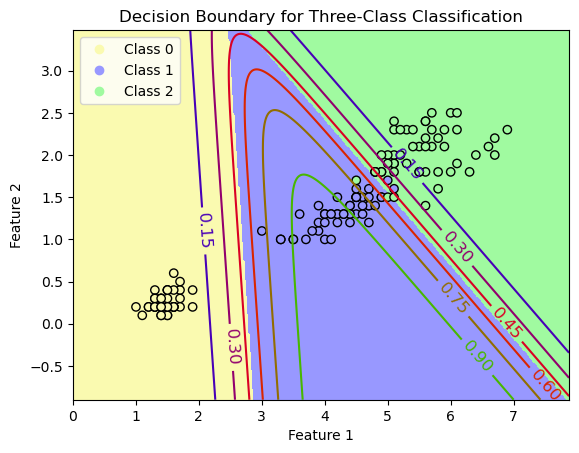

In [78]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
data=load_iris()
df=pd.DataFrame(data['data'],columns=data.feature_names)
target=pd.DataFrame(data['target'],columns=['class'])
data=pd.concat([df,target],axis=1)
num_examples = data.shape[0]#样本量
x_axis = 'petal length (cm)'
y_axis = 'petal width (cm)'
x_train = data[[x_axis,y_axis]].values.reshape((num_examples,2))
# 假设你已经有了训练集的特征 X 和目标变量 y

# 创建逻辑回归模型
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')#multi_class指定为多分类问题,搭配solver使用
X=x_train
y=data['class']
# 训练模型
model.fit(X, y)

# 定义网格化的区域
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = 0.02  # 网格步长
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# 使用模型进行预测
X_new=np.c_[xx.ravel(), yy.ravel()]
Z = model.predict(X_new)
Z = Z.reshape(xx.shape)

y_proba = model.predict_proba(X_new)
zz1 = y_proba[:, 1].reshape(xx.shape)

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
# 绘制决策边界
plt.contourf(xx, yy, Z, cmap=custom_cmap)#控制是否有边界
contour = plt.contour(xx, yy, zz1, cmap=plt.cm.brg)#控制是否有等高线
plt.clabel(contour, inline=1, fontsize=12)
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=custom_cmap, edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary for Three-Class Classification')

unique_labels = np.unique(y)

# 创建图例
legend_labels = []
for label in unique_labels:
    legend_labels.append(f'Class {label}')

plt.legend(handles=scatter.legend_elements()[0], labels=legend_labels, loc='upper left')  # 添加图例

plt.show()